In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [59]:
iris = datasets.load_iris()

In [61]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])


In [63]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
scaler = StandardScaler()

In [67]:
scaled_data = pd.DataFrame(scaler.fit_transform(df))

In [69]:
scaled_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


<Axes: >

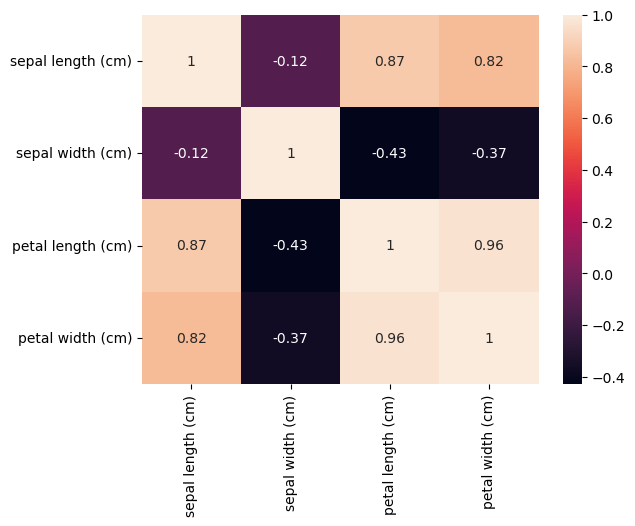

In [71]:
sns.heatmap(df.corr(), annot = True, linecolor='black')


In [73]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


<Axes: >

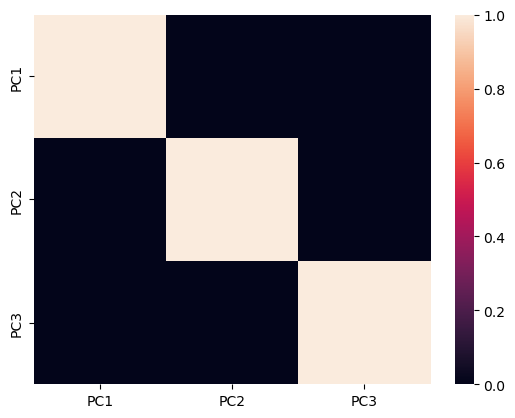

In [75]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())


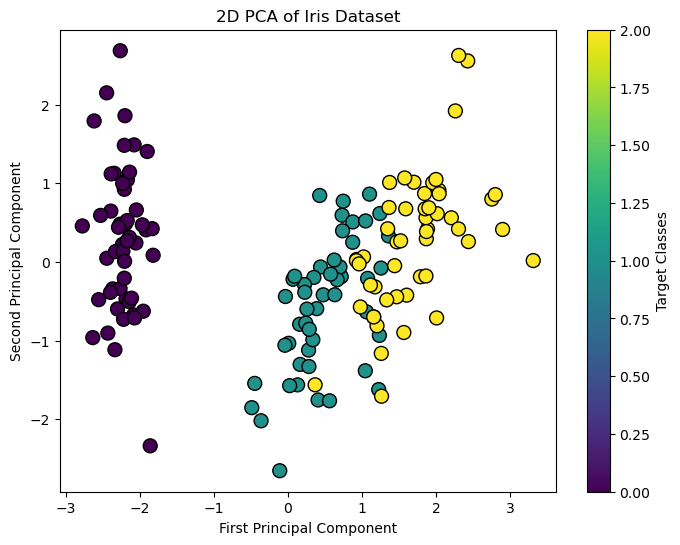

In [77]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA (reduce to 2 dimensions)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize the results in 2D using matplotlib
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('2D PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a color bar with the target class labels
plt.colorbar(scatter, label='Target Classes')

# Show the plot
plt.show()


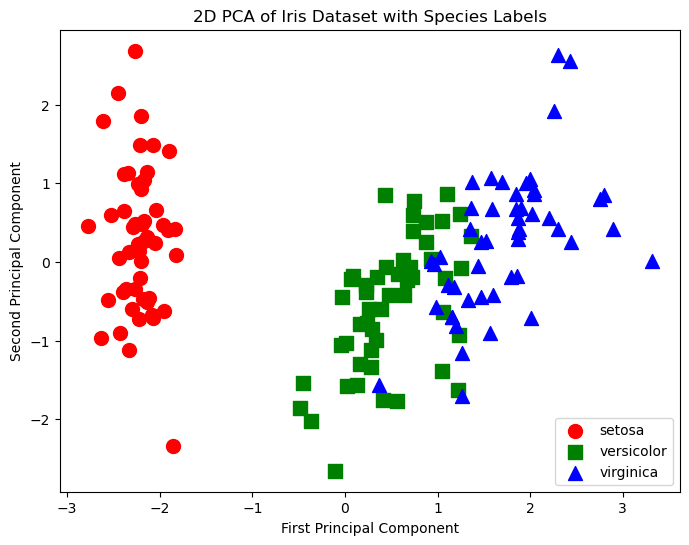

In [79]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
species = iris.target_names  # The species names

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA (reduce to 2 dimensions)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize the results in 2D using matplotlib
plt.figure(figsize=(8,6))

# Plot each species with a different marker
markers = ['o', 's', '^']  
colors = ['r', 'g', 'b'] 

for i, species_name in enumerate(species):
    # Select the data points corresponding to the current species
    species_points = X_pca[y == i]
    plt.scatter(species_points[:, 0], species_points[:, 1], 
                label=species_name, 
                marker=markers[i], color=colors[i], s=100)

# Add labels and title
plt.title('2D PCA of Iris Dataset with Species Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Show legend
plt.legend()

# Show the plot
plt.show()


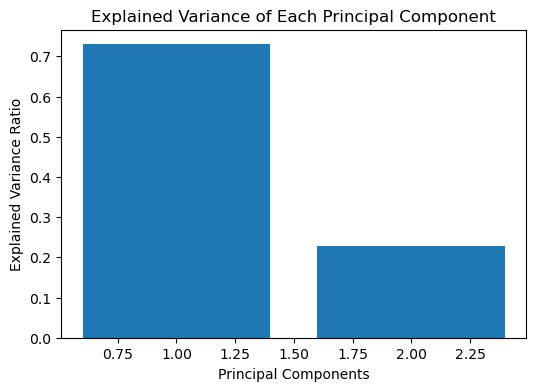

In [81]:
# Visualize explained variance
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Principal Component')
plt.show()


This bar plot will show you the proportion of the total variance explained by each of the principal components. This helps you understand how much information is retained in the reduced dimensionality.